# Part I: Naive Bayes Classifier

 Task 1

1. Naive Bayes assumes all features are conditionally independent given the class label.

2. GaussianNB: for continuous data (normal distribution); MultinomialNB: for count data; BernoulliNB: for binary data.

3. Naive Bayes handles high-dimensional data well due to its simple probabilistic model and low training time.

Task 2

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv", sep='\t', header=None, names=['label', 'message'])

In [3]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [4]:
X = CountVectorizer().fit_transform(df['message'])
y = df['label']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9850478468899522
Precision: 0.9307359307359307
Recall: 0.9598214285714286
Confusion Matrix:
 [[1432   16]
 [   9  215]]


Task 3

In [8]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [9]:
data = load_iris()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

In [11]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
acc_gnb = accuracy_score(y_test, gnb.predict(X_test))

In [12]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
acc_lr = accuracy_score(y_test, lr.predict(X_test))

In [13]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
acc_dt = accuracy_score(y_test, dt.predict(X_test))

In [14]:
print(f"GaussianNB Accuracy: {acc_gnb:.2f}")
print(f"Logistic Regression Accuracy: {acc_lr:.2f}")
print(f"Decision Tree Accuracy: {acc_dt:.2f}")

GaussianNB Accuracy: 0.98
Logistic Regression Accuracy: 1.00
Decision Tree Accuracy: 1.00


# Part II: Decision Trees

Task 4

1. Entropy measures impurity; Information Gain is the reduction in entropy after a split.

2. Gini is faster, entropy more informative.

3. Overfitting happens when the tree is too deep; use pruning, depth limit, or min samples per split.

In [15]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [16]:
df = sns.load_dataset('titanic')

In [17]:
df.dropna(subset=['age', 'embarked', 'sex'], inplace=True)
df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']]
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['embarked'] = LabelEncoder().fit_transform(df['embarked'])

In [18]:
X = df.drop('survived', axis=1)
y = df['survived']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6915887850467289
Confusion Matrix:
 [[93 29]
 [37 55]]


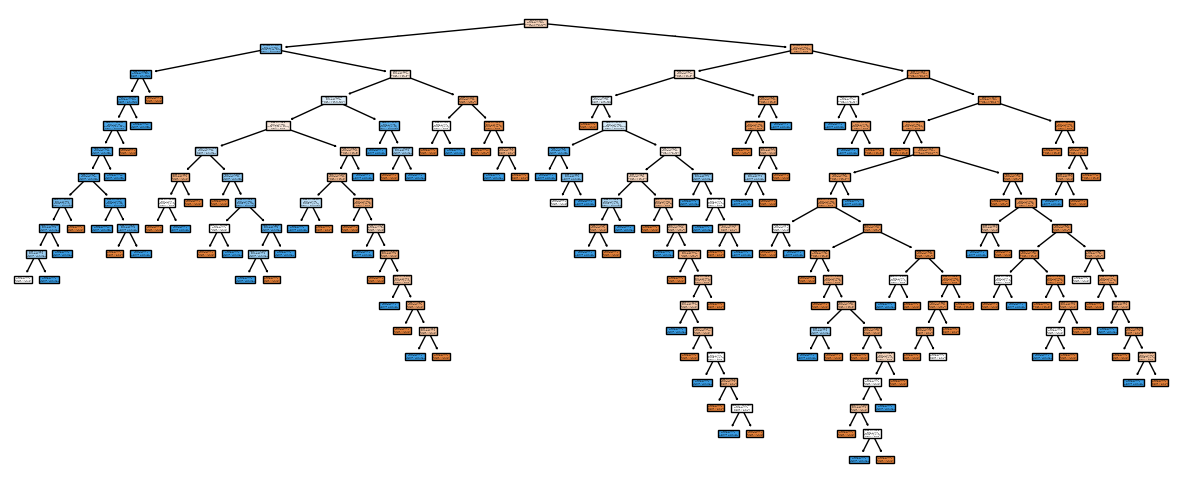

In [22]:
plt.figure(figsize=(15, 6))
plot_tree(clf, feature_names=X.columns, class_names=['Died', 'Survived'], filled=True)
plt.show()

Task 6

In [23]:
train_scores = []
test_scores = []
depths = range(1, 20)

In [24]:
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

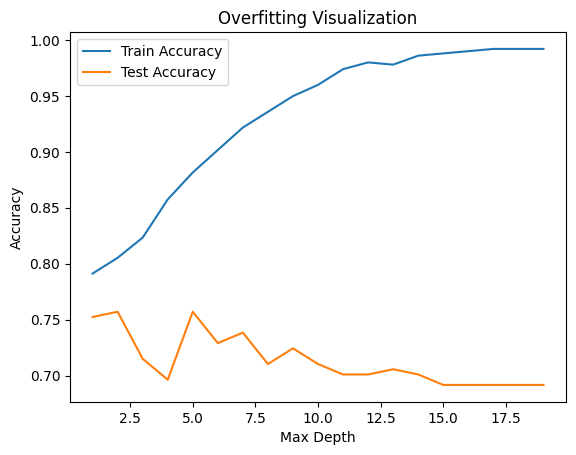

In [25]:
plt.plot(depths, train_scores, label="Train Accuracy")
plt.plot(depths, test_scores, label="Test Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Overfitting Visualization")
plt.show()

# Part III: Ensemble Learning

Task 7


1. Bagging: parallel training; Boosting: sequential training.

2. Random Forest reduces variance by averaging multiple decision trees.

3. Boosting can overfit if there's noise, as it focuses on difficult samples.

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

In [28]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_rf))
print("Precision:", precision_score(y_test, y_rf))
print("Recall:", recall_score(y_test, y_rf))

Random Forest Accuracy: 0.780373831775701
Precision: 0.7710843373493976
Recall: 0.6956521739130435


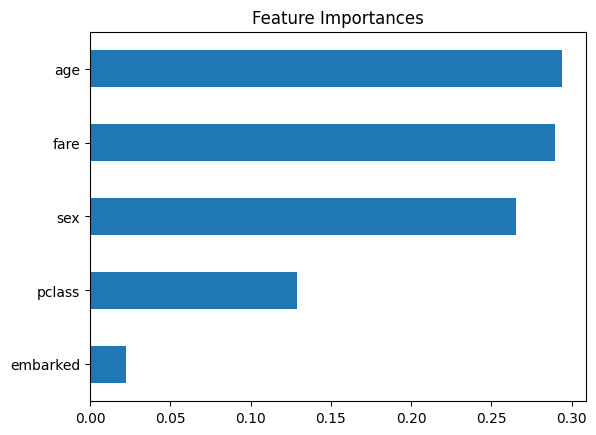

In [29]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title("Feature Importances")
plt.show()

In [30]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import time

In [31]:
start = time.time()
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)
y_ada = ada.predict(X_test)
end = time.time()

In [33]:
from sklearn.metrics import f1_score
print("AdaBoost Accuracy:", accuracy_score(y_test, y_ada))
print("F1 Score:", f1_score(y_test, y_ada))
print("Training Time:", round(end - start, 2), "seconds")

AdaBoost Accuracy: 0.7757009345794392
F1 Score: 0.7446808510638298
Training Time: 0.12 seconds
